<a href="https://colab.research.google.com/github/AlexandraBushueva/my-projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

**Описание проекта**

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Необходимо провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Цель исследования:** установить параметры, влияющие на цену объектов недвижимости

**План исследования**

1. Изучение общей информации о данных:
- импорт бибилиотеки pandas
- импорт данных из csv-файла
- изучение полей и их типов
2. Предобработка данных:
- удаление пропусков
- обработка аномальных значений
- изменение типов данных
- обработка дубликатов
- категоризация данных
3. Добавление новых столбцов в таблицу
4. Исследовательский анализ данных
5. Формирование общего вывода по исследованию

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Изучение общей информации о данных

**Шаг 1.1 Импортируем библиотеки. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Шаг 1.2. Выведем первые 20 строчек датафрейма data на экран.**

In [ ]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Шаг 1.3. Выведем основную информацию о датафрейме с помощью метода info().**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**

1. Необходимо *изменить тип данных* в столбцах:
- **first_day_exposition:** object → datetime. Необходимо перевести поле в формат даты.
- **floors_total:** float64 → int64. В поле указаны целочисленные значения, а в типе данных дробные.
- **is_apartment:** object → bool. Булев тип по условию.
- **balcony:** float64 → int64. В поле указаны целочисленные значения, а в типе данных дробные.
- **parks_around3000:** float64 → int64. В поле указаны целочисленные значения, а в типе данных дробные.
- **ponds_around3000:** float64 → int64. В поле указаны целочисленные значения, а в типе данных дробные.
- **days_exposition:** float64 → int64. В поле указаны целочисленные значения, а в типе данных дробные.

2. Видим много полей *с пропущенными значениями*: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Часть полей с пропущенными значениями заполним в этапе Предобработка данных. Некоторые поля трогать не будем, т.к. пропуски не критичны, либо не могут быть заполнены.

**Шаг 1.4. Выведем описательную статистику по датафрейму с помощью метода describe().**

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**

1. Min значение в поле **rooms**=0. Необходимо перепроверить. Предположительно, 0 комнат может быть в квартире-студии, либо в данных ошибка;
2. В поле **ceiling_height** минимальная высота потолка 1 м, максимальная - 100 м. Похоже на выбросы, которые необходимо удалить;
3. Минимальное значение **living_area** - жилой площади равно 2 м². Такие данные лучше удалить, чтобы не искажать общие выводы;
4. Min значение в поле **kitchen_area** - площадь кухни равна 1,2 м². Не похоже на реалистичные значение. Следует удалить;
5. Min расстояние до аэропорта 0 м - **airports_nearest**. Предположительно, аэропорта рядом вовсе нет и пропуски заполнили 0. Т.к. эти данные для исследования не имеют первостепенного значения, то удалять или заменять значения не будем.

**Шаг 1.5. Построем гистограмму для всех числовых столбцов таблицы на одном графике с помощью метода hist().**

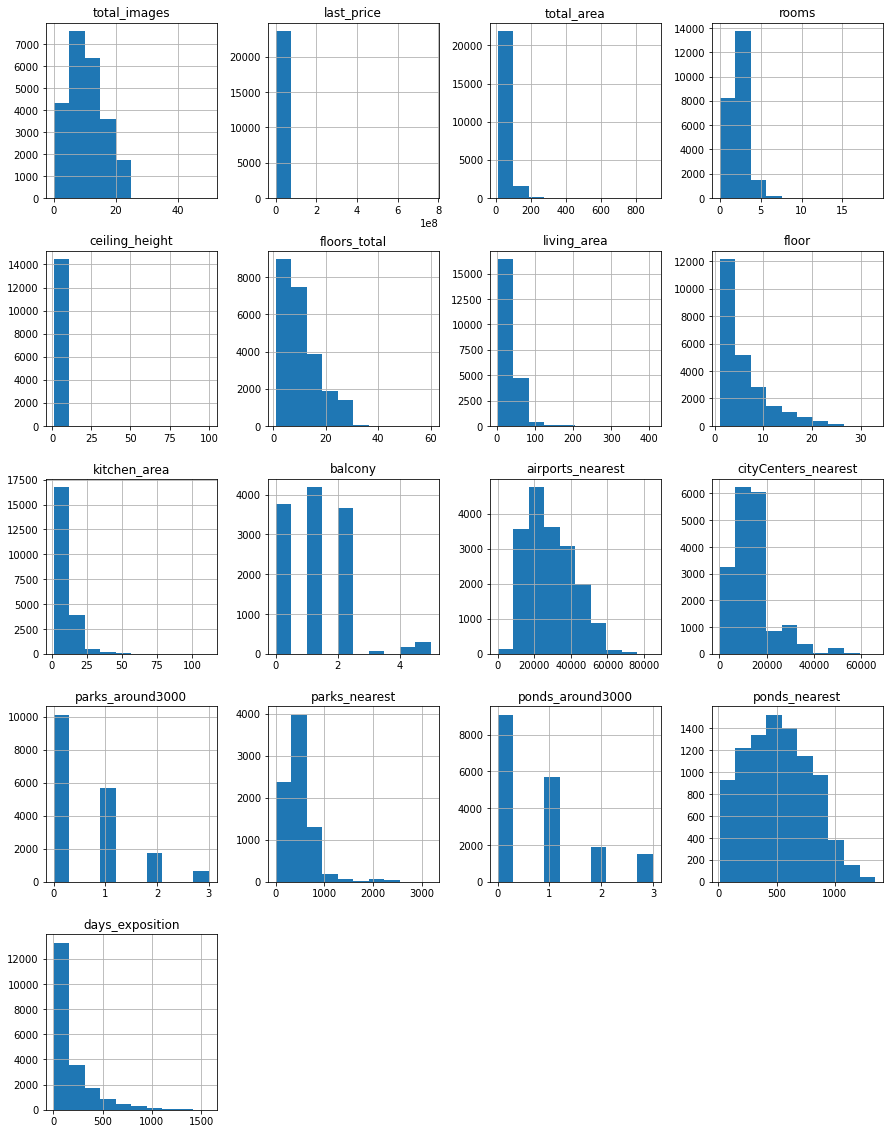

In [ ]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Если в конце строки поставить `;`, то технический вывод `array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,`, уйдёт

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила ; </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо за ликвидацию технических выводов

</div>

### Предобработка данных

**Шаг 2.1. Приведем наименования столбцов к единому стилю.**

In [ ]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Шаг 2.2. Выведем количество пропущенных значений для каждого столбца.**

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

Каждое поле было изучено на предмет пропущенных значений, выдвинуты гипотезы, почему поля могли оказаться пустыми  и решение, что с данными полями дальше делать для исследования. <span style="color:orange"> **Оранжевым**</span> выделены поля, которые будут заполнены вручную. Остальные пропуски будут оставлены в исходных данных.

- **ceiling_height**. При определении стоимости недвижимости высота потолков не имеет первостепенного значения, поэтому проигнорируем пропуски значений. Поле могло быть не заполнено пользователем из-за незнания точной высоыт потолка.       
- **floors_total**. 86 пропусков (0.4% от всех данных) не повлияют на итоговые выводы. Скорее всего пользователи не заполнили это поле из-за тех. ошибки: например, не сохранились данные при заполнении/из-за человеческой ошибки: пропустили заполнение поля. Пропуски не удаляем.           
- **living_area**. Размер жилой площади важный показатель при определении стоимости жилья, однако заменять на средние или медианные значения в данном случае некорректно, как и посчитать площадь жилья другим способом, поэтому пропуски оставим.          
- <span style="color:orange"> **is_apartment**.</span>  Количество пропусков 20 924 из 23 699 (88%) может говорить о том, что поле не заполнялось пользователями. Будем исходить из предположения, что если пользователь продает аппартаменты, то об этом указано в объявлении. Поэтому пропуски заполним значением False.
- **kitchen_area**. Размер кухни, как и площадь жилого помещения, важные показатели, однако заменить их не получится. Поле могло быть не заполнено из-за тех. ошибок, незнания точных цифр площади пользователями. Пропуски оставляем.            
- <span style="color:orange"> **balcony**.</span> Предположительно, если в жилом помещении нет балкона, пользователи не заполняли это поле, поэтому пропуски заменим значением 0.   
- <span style="color:orange"> **locality_name**.</span> Небольшое количество пропусков. Пропуски могли возникнуть из-за сбоев в автоматическом получение данных из геосервисов/отсутствия указанной информации на картах геосервиса. Т.к. информация о расположении важна для анализа, то пропуски удалим.    
- **airports_nearest**. Аналогично полю locality_name. Пропущенные значения оставляем.         
- **city_centers_nearest**. Аналогично полю locality_name, airports_nearest. Пропущенные значения оставляем.         
- **parks_around_3000**. Информация для исследования не является первостепенной. Пропуски оставляем. Причина пропусков как и в поле locality_name.
- **parks_nearest**. Информация для исследования не является первостепенной. Пропуски оставляем. Причина пропусков как и в поле locality_name.
- **ponds_around_3000**. Информация для исследования не является первостепенной. Пропуски оставляем. Причина пропусков как и в поле locality_name.
- **ponds_nearest**. Информация для исследования не является первостепенной. Пропуски оставляем. Причина пропусков как и в поле locality_name.
- <span style="color:orange"> **days_exposition**.</span> Количество дней размещения объявлений должны считаться автоматически. Возможно, произошел сбой при выгрузке данных, либо пустые значения равны 0 дней размещения (т.е. размещено в текущий день). Заменим занчения на 0.



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательная идея поработать с цветом и им выделить то, что заменишь вручную, предположения о заменах логичные, молодец!

**Шаг 2.3. Заполним пропуски в столбцах и удалим строки с пропущенными значениями.**

In [ ]:
# заменяем пропуски на False
data['is_apartment'].fillna(False, inplace=True)
# проверка
data['is_apartment'].isna().sum()

0

In [ ]:
# заменяем пропуски на 0
data['balcony'].fillna(0, inplace=True)
# проверка
data['balcony'].isna().sum()

0

In [ ]:
# заменяем пропуски на 0
data['days_exposition'].fillna(0, inplace=True)
# проверка
data['days_exposition'].isna().sum()

0

In [ ]:
# удаляем строки с пропущенными значениями
data = data.dropna(subset=['locality_name'])
# проверка
data['locality_name'].isna().sum()

0

**Вывод**

Пропущенные значения заполнены

**Шаг 2.3. Заменим типы данных в полях с помощью метода astype().**

In [ ]:
# меняем типы данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['is_apartment'] = data['is_apartment'].astype('boolean')

#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  boolean       
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    

В `astype` можно передавать словари, в котором ключи - названия столбцов, значения - типы данных
</div>

**Шаг 2.4. Выведем перечень уникальных значений столбца и заменим неявные дубликаты.**

In [ ]:
# Выведем перечень уникальных значений местности
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Посчитаем кол-во уникальных значений
data['locality_name'].nunique()

# 364

364

In [ ]:
# Заменяем названия местности. Для определения месторасположения не имеет значение посёлок городского типа
# или обычный поселок, поэтому заменим все похожие значения на посёлок

data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')

#Проверяем
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про неявные дубликаты не забыла, а ещё и подсчитано число повторений названий до и после, замечательно

In [ ]:
# Посчитаем кол-во уникальных значений после замены дубликатов
data['locality_name'].nunique()

# 322 -> дубликаты заменены

322

### Посчитайте и добавьте в таблицу новые столбцы

**Шаг 3.1. Считаем цену одного квадратного метра и добавляем значение в data**

In [ ]:
#добавляем столбец с ценой одного квадратного метра и округляем до 2-х знаков после запятой
data['price_1_meter'] = round((data['last_price'] / data['total_area']), 2)

#проверяем
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0,44091.71
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,149511.40


**Шаг 3.2. Добавляем в data параметры: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления**

In [ ]:
#добавляем столбец день недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#добавляем столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#добавляем столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

#проверяем
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,0,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,0,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602,149511.40,1,3,2017


**Шаг 3.3. Добавляем в data параметр: тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [ ]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

#проверяем
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,0,72490.85,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,45,52542.37,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,0,44091.71,6,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602,149511.40,1,3,2017,другой


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Корректнейшая функция, только подскажу, что последний `elif 1 < floor < floors_total:` можно опустить, так как все остальные условия были перечислены явно ранее

**Шаг 3.4. Добавляем в data параметр: расстояние до центра города в километрах (переведем из м в км и округлим до ближайших целых значений)**

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,0,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602,149511.40,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

**Шаг 4.1. Исследуем отдельные параметры объектов и обрабатаем редкие и выбивающиеся значения**

Сначала обработаем аномальные значения, исходя из выводов, полученных по итогам описательной статистики в **Шаге 1.4**

**1. Min значение в поле rooms=0. Необходимо перепроверить. Предположительно, 0 комнат может быть в квартире-студии**

<AxesSubplot:ylabel='Frequency'>

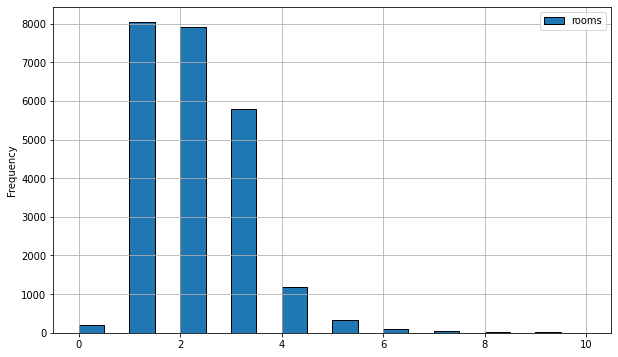

In [ ]:
#Построим гистограмму по полю rooms
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,10))

# Аномальные значения, где rooms=0, остальные данные выглядят правдоподобно

Большая часть объектов недвижимости имеют 1 или 2 комнаты. Чем больше комнат, тем меньше таких объектов недвижимости в объявлениях.

In [ ]:
# Отфильтруем поля, где rooms=0
rooms_0 = data.query('rooms == 0')
rooms_0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,NaN,NaN,181,90740.74,3,3,2017,другой,NaN
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,NaN,NaN,45,92800.00,2,9,2017,первый,NaN
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2.0,982.0,64,91479.16,0,3,2018,другой,15.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,NaN,1.0,593.0,430,98110.47,1,3,2017,другой,19.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,NaN,NaN,29,74000.00,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,...,NaN,1.0,623.0,14,123076.92,4,9,2017,другой,13.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,...,NaN,NaN,NaN,4,90252.71,3,9,2017,другой,NaN
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,NaN,2.0,112.0,31,128846.15,4,9,2018,другой,17.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,...,NaN,NaN,NaN,82,50000.00,5,11,2017,другой,NaN


In [ ]:
# Проверим есть ли среди найденных значений аппартаменты
data.query('rooms == 0 and is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km


In [ ]:
#Гипотеза не подтвердилась.
# Т.к. значений с rooms=0 не так много - 80, и заменить мы их не можем на корректные, то удалим их.
data = data.query('rooms != 0')

In [ ]:
# Проверим удалены ли значения
data.query('rooms == 0 and is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

Это ведь могли быть и студии, почему бы нет?
</div>

**2. В поле ceiling_height минимальная высота потолка 1 м, максимальная - 100 м. Похоже на выбросы, которые необходимо удалить**

<AxesSubplot:ylabel='Frequency'>

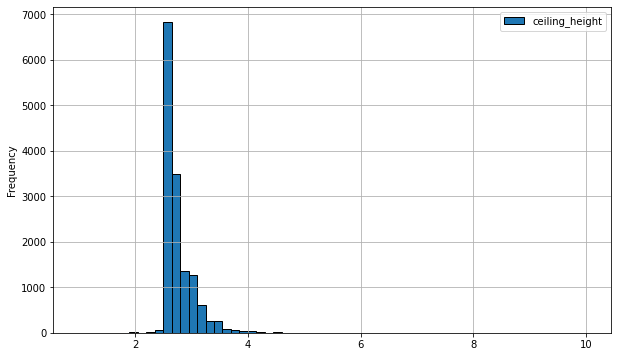

In [ ]:
#Построим гистограмму по полю ceiling_height
data.plot(y = 'ceiling_height', kind = 'hist', bins = 60, grid=True, ec='black', legend=True, figsize = (10,6), range = (1,10))

Большая часть недвижимости с потолками 2.5-3 м. Есть выбивающиеся значения с потолками более 4 м.

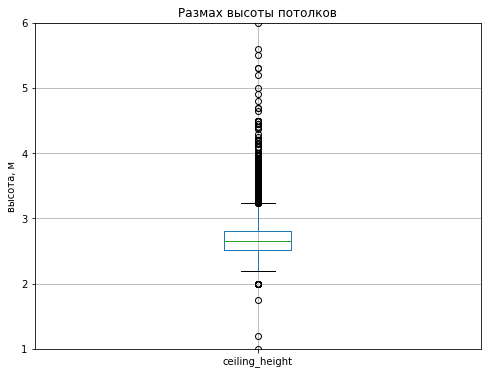

In [ ]:
# Построим диаграму размаха для определения выбросов в значениях
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

In [ ]:
# По диаграме размаха видим, что в выбросы попадают значения менее 2 м и более 3.2 м.
# Для реалистичности данных оставим значения высоты потолков от 2.4 м до 5 м. Остальные значения удалим из данных
data = data.query('2.4 <= ceiling_height <= 5')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,16.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,NaN,1.0,806.0,519,129903.98,3,10,2016,другой,4.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239,73717.95,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,4.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602,149511.40,1,3,2017,другой,10.0


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

Аномальные значения 20-50 метров возможно вызваны неверным местом запятой в высотах
</div>

**3. Минимальное значение living_area - жилой площади равно 2 м²**

<AxesSubplot:ylabel='Frequency'>

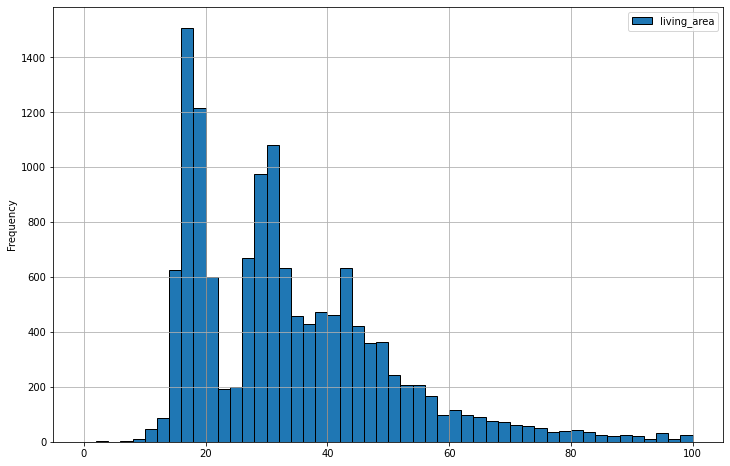

In [ ]:
#Построим гистограмму по полю living_area
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,100))

Чаще всего в объявлениях встречаются квартиры с жилой площадью в диапазонах 15-20 м², 25-30 м², 40-45 м².
Смущают объявления с жилой площадью недвижимости от 0 до 10 м².

In [ ]:
# Посмотрим данные по полям, где жилая площадь менее 10 м²
data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
114,5,4000000.0,21.4,2019-02-07,1,2.90,8.0,8.3,7,False,...,488.0,1.0,286.0,0,186915.89,3,2,2019,другой,6.0
1326,8,8100000.0,52.0,2017-01-29,2,2.70,25.0,9.0,15,False,...,NaN,1.0,1180.0,337,155769.23,6,1,2017,другой,16.0
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9.0,8.4,6,False,...,NaN,0.0,NaN,111,67307.69,3,6,2017,другой,29.0
4100,17,5300000.0,34.8,2017-06-19,1,2.70,23.0,9.0,15,False,...,NaN,0.0,NaN,30,152298.85,0,6,2017,другой,13.0
4542,12,3300000.0,18.0,2018-11-07,1,3.50,5.0,9.0,2,False,...,349.0,1.0,963.0,9,183333.33,2,11,2018,другой,5.0
7312,8,3400000.0,27.0,2018-02-21,2,2.50,15.0,9.0,4,False,...,617.0,0.0,NaN,0,125925.93,2,2,2018,другой,16.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,...,NaN,1.0,1012.0,91,122115.38,1,2,2018,другой,7.0
15833,20,4600000.0,33.0,2017-01-01,1,2.70,22.0,9.0,12,False,...,NaN,0.0,NaN,511,139393.94,6,1,2017,другой,14.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5.0,6.0,1,False,...,430.0,0.0,NaN,168,122548.39,3,4,2018,первый,5.0
17248,20,5300000.0,33.0,2017-04-14,1,2.70,22.0,8.9,16,False,...,NaN,0.0,NaN,216,160606.06,4,4,2017,другой,14.0


In [ ]:
#Количество комнат в таких квартирах от 2 до 4. Целесообразным кажется, что площадь необходимо умножить на 10
data = data.loc[(data['rooms'] > 0) & (data['living_area'] < 10) | (data['living_area'] > 10)]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,16.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29,100566.57,2,2,2018,другой,16.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,NaN,1.0,806.0,519,129903.98,3,10,2016,другой,4.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239,73717.95,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,4.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Вот здесь отличное логичное предположение об ошибках в данных)

**4. Min значение в поле kitchen_area - площадь кухни равна 1,2 м²**

<AxesSubplot:ylabel='Frequency'>

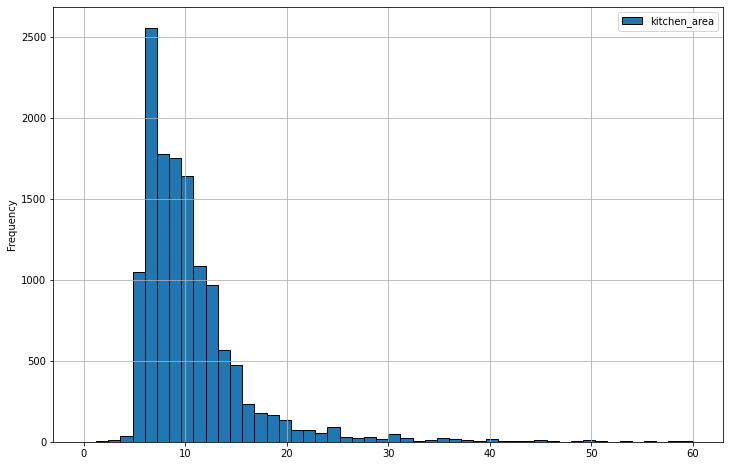

In [ ]:
#Построим гистограмму по полю kitchen_area
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,60))

Площадь большинства кухонь колеблется в диапозоне 5-20 м².
В данные попадают кухни с площадью до 5 м². Таких значений не много, но они выбиваются и не кажутся реалистичными, поэтому удалим их.
И проверим значения, где площадь превышает 30 м². Если площадь кухни превышает площадь жилой зоны, то удалим их.

In [ ]:
# Удалим данные, где площадь кухни менее 5 м²
data = data.query('kitchen_area >= 5')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,16.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29,100566.57,2,2,2018,другой,16.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,NaN,1.0,806.0,519,129903.98,3,10,2016,другой,4.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239,73717.95,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,4.0


In [ ]:
# Проверим сколько полей, где площадь кухни превышает площадь жилой зоны
data.query('kitchen_area > 30 and living_area < kitchen_area')

#В некоторых полях кажется, что площадь кухни и жилую площадь поменяли местами. В остальных значения явно записаны ошибочно.
#Т.к. полей только 71, то удалим их все

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,False,...,NaN,3.0,99.0,541,279503.11,1,10,2017,другой,7.0
263,12,39900000.0,140.6,2016-11-19,2,3.50,8.0,39.8,7,False,...,NaN,3.0,99.0,0,283783.78,5,11,2016,другой,7.0
379,14,21000000.0,96.0,2017-02-07,2,3.00,7.0,20.0,1,False,...,NaN,3.0,418.0,153,218750.00,1,2,2017,первый,2.0
723,9,5850000.0,81.0,2018-05-04,2,2.65,5.0,30.0,5,False,...,292.0,1.0,426.0,176,72222.22,4,5,2018,последний,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,17,26557000.0,80.0,2017-07-17,2,2.90,6.0,25.0,4,False,...,NaN,1.0,785.0,370,331962.50,0,7,2017,другой,4.0
20284,19,9500000.0,86.3,2018-06-20,2,3.20,5.0,28.0,4,False,...,NaN,0.0,NaN,19,110081.11,2,6,2018,другой,2.0
20930,10,23000000.0,107.0,2016-04-21,3,3.00,13.0,31.0,11,False,...,620.0,1.0,809.0,858,214953.27,3,4,2016,другой,5.0
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7.0,8.0,3,False,...,173.0,3.0,126.0,0,175889.33,0,10,2018,другой,8.0


In [ ]:
data = data.query('living_area > kitchen_area')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,16.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137,127525.25,3,11,2017,другой,14.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
16,11,6700000.0,82.00,2017-11-23,3,3.05,5.0,55.6,1,False,...,420.0,0.0,NaN,397,81707.32,3,11,2017,первый,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29,100566.57,2,2,2018,другой,16.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,NaN,1.0,806.0,519,129903.98,3,10,2016,другой,4.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239,73717.95,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,4.0


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

Полезно выводить какое число строк удаляется под каждым из условий. Этого не было проверено, при удалении квартир с площадью кухонь менее 5 метров квадратных  
</div>

**5. Исследуем параметр общей площади**

<AxesSubplot:ylabel='Frequency'>

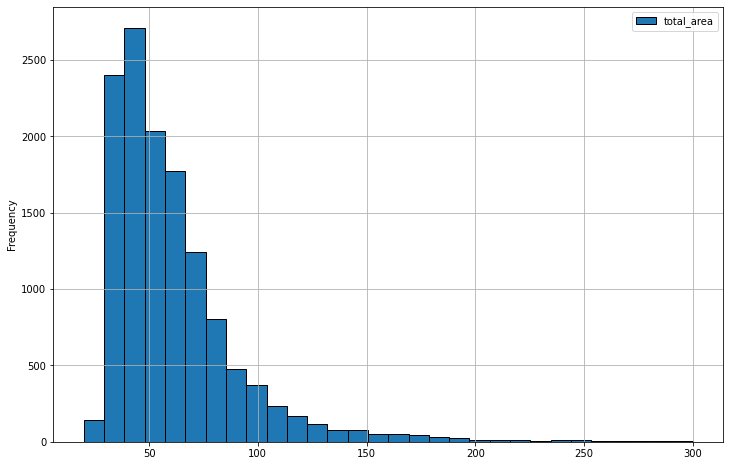

In [ ]:
#Построим гистограмму по полю total_area
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, ec='black', legend=True, figsize = (12,8), range = (20,300))

Основная доля недвижимости имеет общую площадь от 25 до 50 м². Реже встречаются значения более 100 м².
Для достоверности данных проверим, что во всех полях общая площадь больше жилой.

In [ ]:
data.query('living_area > total_area')

#Таких полей нет, значит данные введены корректно

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_1_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km


**6. Исследуем параметр цены объекта**

<AxesSubplot:ylabel='Frequency'>

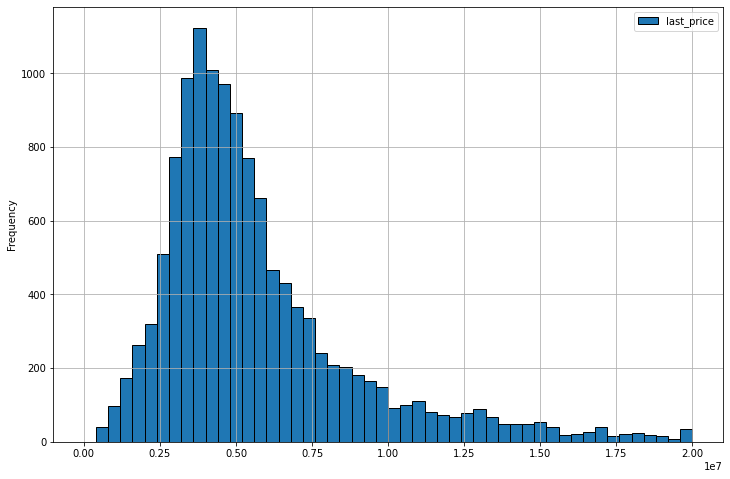

In [ ]:
#Построим гистограмму по полю total_area
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,20000000))


~~Цены распределеяются в диапазоне от 0.25 до 1.2 млн руб. Редко встречаются объекты с ценой менее 0.25 или более 1.2 млн рублей~~

Цены распределеяются в диапазоне от 2.5 до 12 млн руб. Редко встречаются объекты с ценой менее 2.5 или более 12 млн рублей

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

1е7 = 10 миллионов(
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила. Жаль, что мои первые цифры это не реальность(</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Возможно ты просто предвидишь деноминацию)))). Спасибо за совместную работу, желаю успехов далее

</div>

**7. Исследуем параметр тип этажа квартиры («первый», «последний», «другой»)**

In [ ]:
#Посмотрим сколько значений в каждой из категории этажей квартиры
data['floor_category'].value_counts()

другой       9468
последний    1886
первый       1618
Name: floor_category, dtype: int64

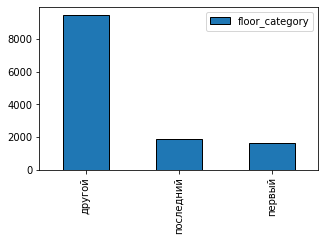

In [ ]:
#Построим гистограмму по полю floor_category
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Квартир на первом и последнем этаже примерно одинаковое значений. Немного чаще встречаются последние этажи. Основная доля приходится на другие этажи

**8. Исследуем параметр общее количество этажей в доме**

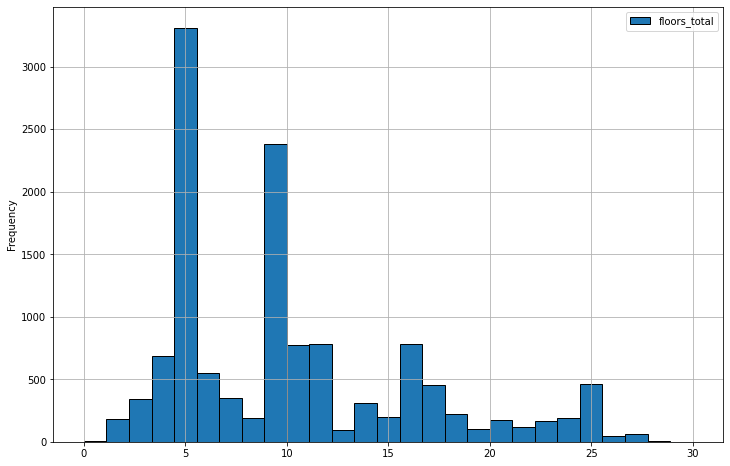

In [ ]:
#Построим гистограмму по полю floors_total
data.plot(y = 'floors_total', kind = 'hist', bins = 27, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,30));

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

В этом проекте не столь критично, но вообще подписывать оси и добавлять заголовок для графика очень полезно, это повышает информативность визуализации
</div>

Большинство квартир распололожены в домах с кол-ом этажей 5, 9. Если рассматривать общий диапозон, то видим, что квартиры располагаются с 1-го по 28-ой этажи

**9. Исследуем параметр расстояние до центра города в метрах**

<AxesSubplot:ylabel='Frequency'>

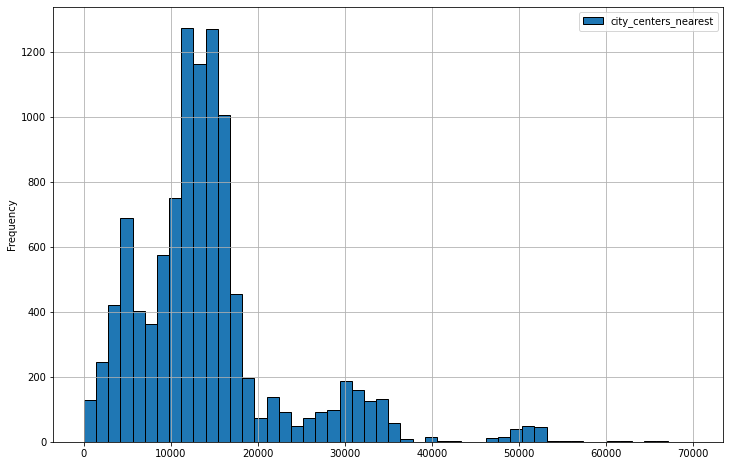

In [ ]:
#Построим гистограмму по полю city_centers_nearest
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 50, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,70000))

Большинство объектов недвижимости расположены в 0-20 км от центра

**10. Исследуем расстояние до ближайшего парка**

<AxesSubplot:ylabel='Frequency'>

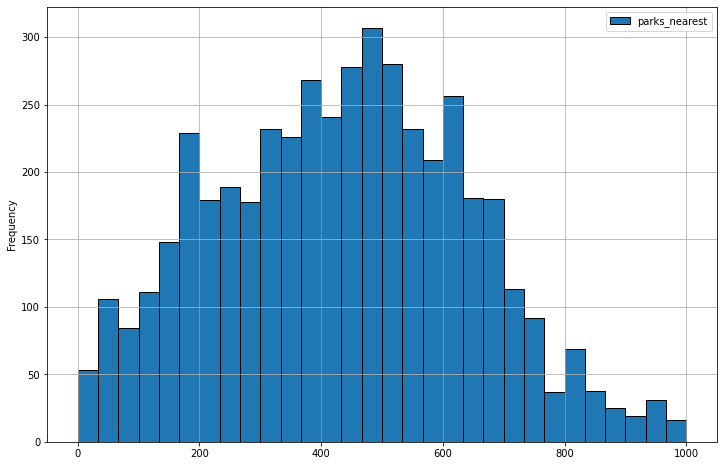

In [ ]:
#Построим гистограмму по полю parks_nearest
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,1000))

Расстояние до ближайшего парка располагается в диапазоне от 0 до 1100 м. Большинство объектов недвижимости расположены от ближайшего парка на расстоянии 400-600м.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Можно назвать Санкт-Петербург довольно зелёным городом)

**Шаг 4.2 Изучим, как быстро продавались квартиры (столбец days_exposition)**

In [ ]:
#Построим описательную статистику
data['days_exposition'].describe()

count    12975.000000
mean       159.617495
std        220.759835
min          0.000000
25%         16.000000
50%         75.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение размещения объявления о продаже квартиры - 160 дней, медианное - 75 дней. Некоторые объявление размещались в течение 0 дней, скорее всего они заводились ошибочно или снимались по тех. причинам.

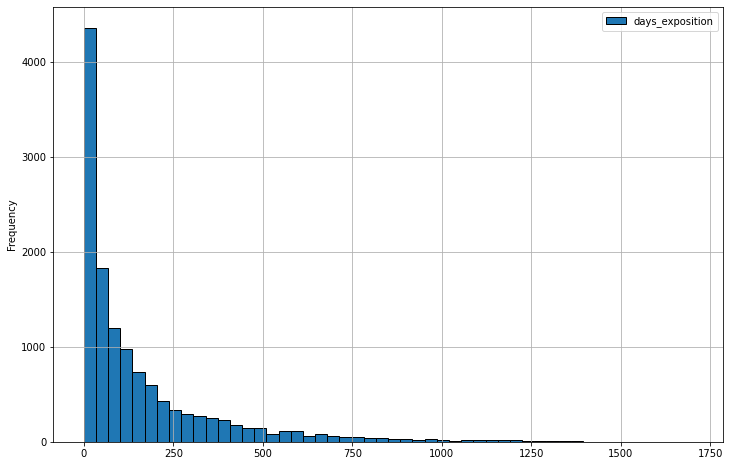

In [ ]:
#Построим гистограмму по полю days_exposition
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,1700));

По гистограмме видим, что основная доля объявлений висит на сайте от 0 до 250 дней. Реже объекты недвижимости продаются более 500 дней. Большая часть объявлений смнимается в день публикации. Сделать однозначные выводы о том, что за это время объекты недвижимости продались мы не можем. Объявление могло быть снято по иной причине: потеряло актуальность; было размещено на другом сайте; объявление было снято принудительно администраторами сайта и т.д.

In [ ]:
#Рассмотрим более узкий диапозон по полю days_exposition

<AxesSubplot:ylabel='Frequency'>

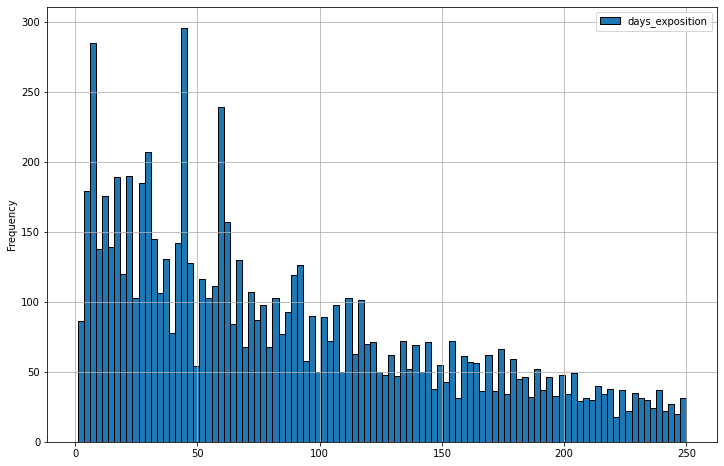

In [ ]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, ec='black', legend=True, figsize = (12,8), range = (1,250))

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Возможно это сроки автоматического снятия объявлений с сайта, если квартира не продается

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Молодец! Ещё одно абсолютно логичное предположение, которое обосновывает имеющуюся закономерность

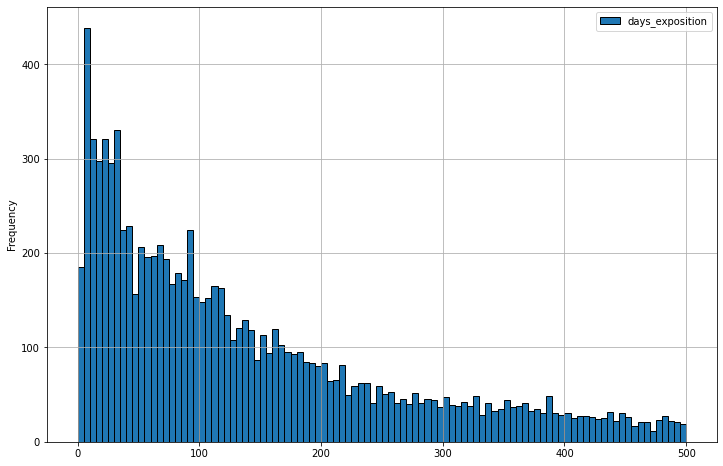

In [ ]:
#Чтоыб ответить на вопрос, какие продажи можно считать быстрыми, а какие — необычно долгими, удалим выбивающиеся значения
days_speed = data.query('days_exposition !=0 and days_exposition !=45 and days_exposition !=60')

#Построим гистограмму по полю days_exposition
days_speed.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, ec='black', legend=True, figsize = (12,8), range = (0,500));

Категории времени продажи:
- быстрая продажа - от 1 до 45 дней,
- среднестатистическая продажа - от 45 до 250 дней,
- долгая продажа - от 250 до 500 дней.

Продажи превышающие 510 дней - выбросы в данных.

**Шаг 4.3 Исследуем, какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [ ]:
#Построим матрицу корреляции для определения влияющих факторов на общую стоимость квартиры
# 1. Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor',
    'parks_nearest',
    'airports_nearest',
    'weekday_exposition',
    'month_exposition',
    'year_exposition']
# 2. Посчитаем корреляцию и выведем на экран
corr_matrix = data[corr_param].corr()
display(corr_matrix)

,last_price,total_area,living_area,kitchen_area,rooms,floor,parks_nearest,airports_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.707521,0.625377,0.550543,0.408807,0.045415,-0.019207,-0.028583,-0.018077,0.005654,-0.046233
total_area,0.707521,1.000000,0.949222,0.663568,0.777351,0.001073,-0.023337,-0.035006,-0.025588,0.011040,-0.100755
living_area,0.625377,0.949222,1.000000,0.518509,0.850618,-0.072956,-0.046198,-0.055885,-0.022352,0.003607,-0.087448
kitchen_area,0.550543,0.663568,0.518509,1.000000,0.331665,0.154795,0.025688,0.001160,-0.026221,0.017194,-0.094677
rooms,0.408807,0.777351,0.850618,0.331665,1.000000,-0.126261,-0.040603,-0.062213,-0.014129,0.001995,-0.065659
floor,0.045415,0.001073,-0.072956,0.154795,-0.126261,1.000000,0.070424,0.081128,0.006403,0.012649,-0.000305
parks_nearest,-0.019207,-0.023337,-0.046198,0.025688,-0.040603,0.070424,1.000000,-0.060857,-0.007071,0.022611,-0.006213
airports_nearest,-0.028583,-0.035006,-0.055885,0.001160,-0.062213,0.081128,-0.060857,1.000000,0.004373,0.005291,-0.004772
weekday_exposition,-0.018077,-0.025588,-0.022352,-0.026221,-0.014129,0.006403,-0.007071,0.004373,1.000000,-0.008616,-0.002514
month_exposition,0.005654,0.011040,0.003607,0.017194,0.001995,0.012649,0.022611,0.005291,-0.008616,1.000000,-0.289992


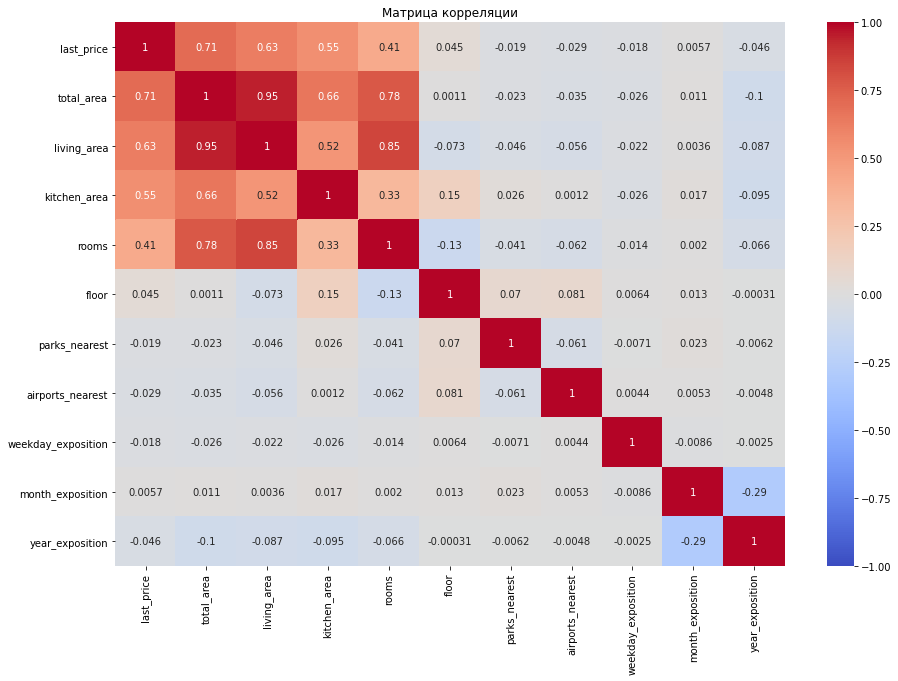

In [ ]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_param,
            xticklabels=corr_param)
plt.title('Матрица корреляции')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Тепловая карта - отличная визуализация, но рекомендую добавлять `linewidth`, этот параметр отвечает за ширину линии разделителя между ячейками, что делает график чуть более читаемым.


На матрице видим, что параметры с наибольшей корреляцией, определяющие цену недвижимости - это общий размер площади, размер жилой зоны, площадь кухни и количество комнат. Чем больше площадь, тем выше цена на продаваемый объект.

Не имеет зависимости цена квартиры с днем, месяцям и годом размещения объявления, а также этажем в доме, удаленностью от парка и аэропорта.

In [ ]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_1_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category

,mean,count,median
floor_category,,,
другой,104393.579864,9468,99490.19
первый,84506.086236,1618,83461.87
последний,94647.234629,1886,89830.45


Целесообразно сравнить показатели по первому и последнему этажу, т.к. в категорию "другой" попадает широкий диапазон этажей.
Видим, что по среднему и медиане цены квартир выше на последнем этаже, чем на первом. Больше объявлений размещается с продажей квартир на последнем этаже, но не значительно.

Из-за большей выборки "других" этажей средняя и медианная цена на квартиры выше, чем на первых и последних этажах.

**Шаг 4.4 Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [ ]:
#Топ 10 населенных пунктов с наибольшим числом объявлений
top_10 = data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      9101
Всеволожск            246
Пушкин                211
посёлок Шушары        198
Колпино               193
посёлок Мурино        176
Петергоф              136
Гатчина               132
посёлок Парголово     123
Сестрорецк            115
Name: locality_name, dtype: int64

In [ ]:
# Найдем среднюю цену за 1 м² по топ 10
data.query('locality_name in @top_10.index').pivot_table(
                                                          index='locality_name',
                                                          values='price_1_meter'.sort_values(
                                                                                               by='price_1_meter',
                                                                                               ascending=False)

SyntaxError: unexpected EOF while parsing (2227680626.py, line 6)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Всё верно, но было бы полезно округлить цену за метр например до 2 знаков

Наиболее дорогие квартиры продаются в Санкт-Петербурге, Пушкине, Сестрорецке. Цена на 1 м² превышает 100 тыс. руб.
Самая низкая стоимость 1 м² в Всеволожске - 67 тыс. руб.

**Шаг 4.5 Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга**

In [ ]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [ ]:
# Рассчитаем среднюю цену за 1 м² до центра
(
data_spb
    .pivot_table(index='city_centers_nearest_km', values='price_1_meter')
    .plot(grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена 1 м²')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличная гипотеза о том, что на каком-то удалении могут начать возникать дома, это можно проверить)
* Касательно связи с удалением от центра, возможно ещё в городе есть другие локации кроме центра города, повышающие стоимость
* Полезная привычка смотреть сколько заведений в каждом разрезе остаётся, так часто повышения волатильности величины связано с малым числом наблюдений

Видим, что максимальная цена за 1 м² достигается в квартирах, расположенних в близи от центра на расстоянии до 10 км - от 110 тыс. до 180 тыс. Также видим пик на расстоянии 27 км от центра. Возможно это загородное жилье, расположенное в охраняемом посёлке или что-то подобное

### Общий вывод

**В процессе проведенного исследования были проделаны следующие итерации с данными:**

**1. Приведены наименования столбцов к единому стилю**: 'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'

**2. Заменины типы данных в полях**: first_day_exposition:object → datetime, is_apartment: object → bool, balcony: float64 → int64, days_exposition: float64 → int64

**3. Заменены пустые значения в полях**: is_apartment, balcony, locality_name, days_exposition

**4. Заменены неявные дубликаты** в поле с наименованием местности locality_name

**5. Добавлены в таблицу новые столбцы:**
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

**6. Проведен исследовательский анализ по основным параметрам данных.** Удалены выбросы, заменены значения, которые можно было заменить, найдены аномальные значения и удалены.

**По итогам исследования были получены следующие выводы:**

1. Основной фактор влияющий на стоимость квартиры - ее площадь
2. По мере увеличения площади жилья, увеличивается стоимость квартиры
3. Наиболее дорогая цена за 1 м² в Санкт-Петербурге и Пушкине. Самая низкая стоимость 1 м² во Всеволожске.
4. Дороже стоят квартиры, располагающиеся на последнем этаже дома
5. Цена за 1 м² будет больше по мере приближения к центру города
6. Основная доля недвижимости, размещенной в объявлениях, имеет общую площадь от 25 до 50 м², располагается на 5,9 этажах, имеет потолки от 2.5 до 3 м, имеет 1, 2 комнаты. Большинство объектов недвижимости в объявлениях расположены от ближайшего парка на расстоянии 400-600м



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Всё отлично, исправить одно маленькое замечание и я пожелаю тебе успехов с последующими проектами)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод